## Conventions 
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha_u},\quad 
\alpha_* \rightarrow \texttt{alpha_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha_fp} $ <br>

## Indices 
$$ \text{General index for coordinates in theory space:} \quad n = 1, \ldots, N; \quad \beta^n, g^n, \partial_n F, \partial_n \psi .$$ \
$$ \text{Index for coordinates on $S_{UV}$:} \quad \alpha = 1, \ldots, M=\text{dim}(S_{UV}); \quad \beta^{\alpha}, u^{\alpha} .$$ \
$$ \text{Index for coordinates that specify the embedding of $S_{UV}$ in $\mathbb{R}^N$:} \quad \mu = 1, \ldots, N-M; \quad \beta^{\mu}, v^{\mu}, F_{\mu}, M_{\mu}, p_{\mu} .$$ \
$$ \text{Index for the basis functions for the generating function and primary index for colocation points:} \quad i = 1, \ldots, N_p = \#\text{colocation points}; \quad \psi^i, p_i, g^{in}_{col} .$$ \
$$ \text{Secundary (Tertiary) index for colocation points:} \quad j,k = 1, \ldots, N_p = \#\text{colocation points}; \quad g^{jn}_{col}, g^{kn}_{\sim} .$$

## Objects
$$ \text{Coordinates in theory space:} \quad g^n \mapsto \{u^{\alpha}, v^{\mu} \}; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Beta functions:} \quad \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N; \quad \text{N-dim. (0,1)-tensor} .$$ \
$$ \text{Generating function:} \quad F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; F_{\mu} = p_{i \mu} \psi^i \equiv (p\psi)_{\mu}; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Basis functions:} \quad \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^{N_p}; \quad \text{$N_p$-dim. (0,1)-tensor} .$$ \
$$ \text{Free parameters:} \quad p_{i \mu}; \quad \text{($N_p \times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of generating function:} \quad (\partial F)_{n \mu} \equiv \partial_n F_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N-M}; \partial_n F_{\mu} = p_{i \mu}\partial_n \psi^i \equiv (p\partial \psi)_{n \mu}; \quad \text{(N$\times$(N-M))-dim. (2,0)-tensor} .$$ \
$$ \text{Derivatives of the basis functions:} \quad (\partial\psi)_n^i \equiv \partial_n \psi^i: \mathbb{R}^N \mapsto \mathbb{R}^N \times \mathbb{R}^{N_p}; \quad \text{(N$\times N_p$)-dim. (1,1)-tensor} .$$ \
$$ \text{Master equation:} \quad M_{\mu}: \mathbb{R}^N \mapsto \mathbb{R}^{N-M}; M_{\mu} = (\partial_n F_{\mu}) \beta^n = p_{i \mu} (\partial_n \psi^i) \beta^n; \quad \text{(N-M)-dim. (1,0)-tensor} .$$ \
$$ \text{Colocation points:} \quad g_{col}^{in}; \quad \text{($N_p\times$N)-dim. (0,2)-tensor} .$$ \
$$ \text{Most of these objects have a version specific at the fixed point, denoted by a * sub- or superscript} .$$ \
$$ \text{Alternatively, they might have a version specific to points around the fixed point, denoted by a $\sim$ sub- or superscript} .$$

In [1]:
## imports
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as r
from itertools import product
from scipy.optimize import curve_fit

## setup
np.set_printoptions(linewidth=160)


Complexity of order O(Np^1.6)


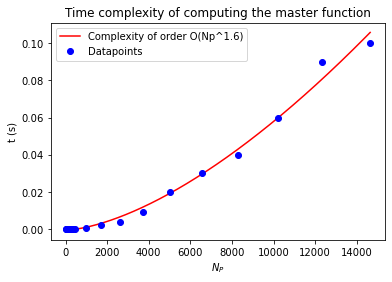

In [2]:
## Graphs from tests

# Runtime of master equation test data
def poly(x, a, b, c):
    return a*x**c+b
td_M = np.zeros((2,20))
td_M[0,:] = np.square(np.array([3,5,7,9,11,13,15,17,19,21,31,41,51,61,71,81,91,101,111,121]))
td_M[1,:] = np.array([1e-5,1e-5,2e-5,2e-5,3e-5,4e-5,5e-5,7e-5,9e-5,1e-4,4e-4,2e-3,4e-3,9e-3,2e-2,3e-2,4e-2,6e-2,9e-2,1e-1])
td_M_popt, td_M_pcov = curve_fit(poly, td_M[0,:], td_M[1,:])
print(f'Complexity of order O(Np^{np.round(td_M_popt[2],1)})')
td_M_x = np.linspace(td_M[0,0],td_M[0,-1],int(td_M[0,-1]-td_M[0,0]))
plt.figure()
plt.plot(td_M_x, poly(td_M_x, *td_M_popt), c='r', label=f'Complexity of order O(Np^{np.round(td_M_popt[2],1)})')
plt.plot(td_M[0],td_M[1],'o',c='b', label='Datapoints')
plt.xlabel(r'$N_P$')
plt.ylabel('t (s)')
plt.title('Time complexity of computing the master function')
plt.legend()
plt.show()

## Beta functions
$$ \beta^n: \mathbb{R}^N \mapsto \mathbb{R}^N, g^n = \begin{pmatrix} u^1 \\ \vdots \\ u^M \\ v^1 \\ \vdots \\ v^{N-M} \end{pmatrix} \mapsto \begin{pmatrix}  \beta^1(g^n) \\ \vdots \\ \beta^N(g^n) \end{pmatrix}  
\equiv \beta^n: \mathbb{R}^2 \mapsto \mathbb{R}^2, g^n= \begin{pmatrix} u \\ v \end{pmatrix} \mapsto \begin{pmatrix} 2u-\frac{3u^3}{2\pi (v+u)^3} \\ -\frac{u^2(7v+u)}{4\pi (v+u)^3} \end{pmatrix}  $$

In [3]:
## beta functions
def beta(G): # G[j'th point, nth coord]
    return np.array([2*G[:,0] - 3*G[:,0]**3 / (2*math.pi*(G[:,1] + G[:,0])**3), -G[:,0]**2*(7*G[:,1] + G[:,0]) / (4*math.pi*(G[:,1] + G[:,0])**3)]) # beta[n] [!] this line is specifically 2D

## NGFP
$$ \beta^n(g^n_*) = 0 \implies \begin{pmatrix} u_* \\ v_* \end{pmatrix} = \begin{pmatrix} \frac{343}{288\pi} \\ -\frac{49}{288\pi} \end{pmatrix} \implies F_{\mu}(g^n_*)=0 $$ 

In [4]:
## NGFP (beta functions = 0)
fp = np.array([343/(288*math.pi), -49/(288*math.pi)]) # fp[n] [!] this line is specifically 2D
N = fp.size
M = 1 # [!] this line is specifically 2D


## Linear generating function and its derivatives
$$ F^*_{\mu}(g^n) = c_{n' \mu}\begin{pmatrix}g^n \\ 1\end{pmatrix}^{n'} =
\begin{pmatrix}
    c_{1,1} g^1 + c_{1,2} g^2 + \cdots + c_{1,N} g^N + c_{1,N+1} \\
    \vdots \\
    c_{N-M,1} g^1 + c_{N-M,2} g^2 + \cdots + c_{N-M,N} g^N + c_{N-M,N+1}
\end{pmatrix}^T
\equiv F^*(u,v) = (172-137\sqrt{43})u + (215+44\sqrt{43})v + \frac{49(1003\sqrt{43}-989)}{288\pi} $$ \
$$ \partial_n F^*_{\mu}(g^n) = (\partial F^*(g^n))_n = c_{n\mu} =
\begin{pmatrix}
    c_{1,1} & \cdots & c_{1,N-M} \\
    \vdots & & \vdots \\
    c_{N,1} & \cdots & c_{N,N-M}
\end{pmatrix}
\equiv (\nabla F^*(u,v))_n = \Bigg( 172-137\sqrt{43} \quad 215+44\sqrt{43} \Bigg) $$

In [5]:
## linear generating function and its derivative

c_fp = np.array([
    [172 - 137*43**0.5], 
    [215 + 44*43**0.5], 
    [49*(1003*43**0.5 - 989)/(288*math.pi)]
]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D

def F_fp(g): # Calculate c_fp[n',mu]*g[n'] (n' means (gn, 1))
    return np.matmul(np.append(g,[1]),c_fp) # F_fp [!] this line is specifically 2D

def dF_fp(): # Return dF_fp
    return np.array([c_fp[:-1,:]]) # dF_fp[nth derivative] [!] this line is specifically 2D


## Colocation points

In [6]:
## generate grid of colocation points

N_cp_g = 15 # Number of colocation points in each direction g^n
N_cp = N_cp_g**N # Number of colocation points
cp_bound = 0.5 # Search space above and below fp
sigma = cp_bound*2/N_cp_g # smoothness factor for basis functions

print(sigma)

cps = np.array([np.linspace(gn-cp_bound, gn+cp_bound, N_cp_g) for gn in fp]) # linspaces that span space of colocation points
gg = np.array(np.meshgrid(*cps,indexing='ij')) # gg[n,n_cp_g1,...,n_cp_gn]

def idToCoord(cp):
    # maps a 1D array of collocation point ids [0, ..., N_cp_g-1] to the coordinates on the grid
    coords = np.zeros((cp.size, N))
    for d in (range(1,N+1)):
        D = N-d
        coords[:,D] = cp - np.mod(cp, np.ones(cp.size)*N_cp_g**D)
        if D != N-1:
            for dd in range(D+1,N):
                coords[:,D] -= coords[:,dd]*N_cp_g**dd
        coords[:,D] = np.divide(coords[:,D], np.ones(cp.size)*N_cp_g**D)
        coords = coords.astype(int)
    return np.array([gg[:,coords[:,0],coords[:,1]][:,i] for i in range(0, cp.size)]) # idToCoord[ith cp, nth coord] [!] this line is specifically 2D

CP = idToCoord(np.array(list(range(0,N_cp)))) # CP[ith cp, nth coord]


0.06666666666666667


## Basis functions (Multivariate Cauchy Distributions)
$$ g^{ni}_{col} = (g^{in}_{col})^T $$ \
$$ \psi^i(g^n) = \Bigg( 1 + \sum^N_n\frac{(g^n-g^{ni}_{col})^2}{\sigma^2} \Bigg)^{-1} $$ \
$$ \partial_n\psi^i(g^n) = (\partial\psi(g^n))_n^i = -\frac{2}{\sigma^2}(g^n-g^{ni}_{col})\psi^i(g^n)^2 $$

In [7]:
## Basis functions and their derivatives

CP_transpose = CP.transpose() # CP_transpose[nth coord,ith cp]

def psi(G): # G[j'th point, nth coord]
    # divide(1, (1 + 1/sigma**2 * matmul(1, square([g,...,g]^T - CP^T)))) for all g in G
    return np.array([np.divide(np.ones(N_cp),(np.ones(N_cp) + (1/sigma**2)*np.matmul(np.ones(N),np.square(np.tile(g,(N_cp,1)).transpose() - CP_transpose)))) for g in G]) # psi[jth point,ith function]

def dpsi(G): # G[j'th point, nth coord]
    # multiply(-2/sigma**2 * ([g,...,g]^T - CP^T) for all g in G, (tile(square(psi(CP)),(N,1,1)), axes=[1,0,2])^T)
    return np.multiply(np.array([((-2/sigma**2) * (np.tile(g,(N_cp,1)).transpose() - CP_transpose)) for g in G]), np.transpose(np.tile(np.square(psi(CP)),(N,1,1)), axes=[1,0,2])) # dpsi[jth point, nth derivative,ith function]


## Pre-calculate

In [8]:
## Precaluculate up until now
pc_F_fp = np.array([F_fp(cp) for cp in CP]) # [jth point, function mu]
print(f'F:{pc_F_fp.shape}')
pc_dF_fp = dF_fp() # [function mu, nth derivative]
print(f'dF:{pc_dF_fp.shape}')
pc_psi = psi(CP) # [jth point,ith function]
print(f'psi:{pc_psi.shape}')
pc_dpsi = dpsi(CP) # [jth point, nth derivative,ith function]
print(f'dpsi:{pc_dpsi.shape}')
p = np.ones((N_cp,M)) # p[ith basis function, function mu]
print(f'p:{p.shape}')
pc_beta = beta(CP) #
print(f'beta:{pc_beta.shape}')

F:(225, 1)
dF:(1, 2, 1)
psi:(225, 225)
dpsi:(225, 2, 225)
p:(225, 1)
beta:(2, 225)


## Fixed parameters
$$ \partial_n F_{\mu} \big|_{g^n_*} = \partial_n F^*_{\mu} \implies F_{\mu} \big|_{g_{\sim}^n} \approx F^*_{\mu} \big|_{g_{\sim}^n} $$ \
$$ \text{For one these $g_{\sim}^n$ : } p_{i \mu}\psi^i(g_{\sim}^n) \approx F^*_{\mu}(g_{\sim}^n) \implies p_{1\mu} \approx \frac{1}{\psi^1(g_{\sim}^n)}\bigg[ F^*_{\mu}(g_{\sim}^n) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g_{\sim}^n) \bigg] $$ \
$$ \text{For $K$ of these $g^{kn}_{\sim}$ : } $$ \
$$ g^{1n}_{\sim}: \quad p_{1\mu} \approx \frac{1}{\psi^1(g^{1n}_{\sim})}\bigg[ F^*_{\mu}(g^{1n}_{\sim}) - \sum_{i=2}^{N_p} p_{i \mu}\psi^i(g^{1n}_{\sim}) \bigg] $$ \
$$ g^{2n}_{\sim}: \quad p_{2\mu} \approx \frac{1}{\psi^2(g^{2n}_{\sim})}\bigg[ F^*_{\mu}(g^{2n}_{\sim}) - p_{1\mu}\psi^1(g^{2n}_{\sim}) - \sum_{i=3}^{N_p} p_{i \mu}\psi^i(g^{2n}_{\sim}) \bigg] $$ \
$$ \vdots $$ \
$$ g^{Kn}_{\sim}: \quad p_{K\mu} \approx \frac{1}{\psi^K(g^{Kn}_{\sim})}\bigg[ F^*_{\mu}(g^{Kn}_{\sim}) - \sum_{k=1}^{K-1}p_{k\mu}\psi^k(g^{Kn}_{\sim}) - \sum_{i=K+1}^{N_p} p_{i \mu}\psi^i(g^{Kn}_{\sim}) \bigg] $$ \
$$ \text{This fixes $K \times (N-M)$ parameters $p_{i\mu}$} .$$

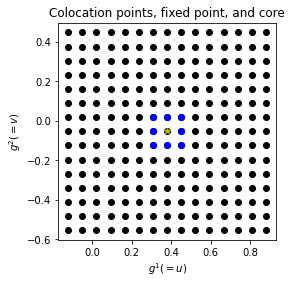

In [9]:
## Find the values for the fixed p's
p = np.ones((N_cp,M)) # reset

# Find the id's of the 8 points directly around the fp
def findCoreIds(): # Find the id's of the 3^N-1 points directly around the fp
    perms = np.array([i for i in product([-1,0,1], repeat=N)])
    perms = np.delete(perms, int((perms.shape[0]-1)/2), 0)
    ids = np.zeros(3**N-1)
    for i in range(0,perms.shape[0]):
        for j in range(0, perms.shape[1]):
            ids[i] += N_cp_g**j*((N_cp_g-1)/2 + perms[i,j])
    return ids.astype('int') # findCoreIds[k'th core point]

def findFpId():
    ids = 0
    for j in range(0, N):
        ids += N_cp_g**j*(N_cp_g-1)/2
    return int(ids)

fp_id = findFpId()

core_ids = findCoreIds()
core_coords = idToCoord(core_ids)

# plot colocation points and core
if N == 2:
    fig_grid = plt.figure()
    ax_grid = fig_grid.add_subplot()
    plt.plot(gg[0], gg[1], marker='o', color='k', linestyle='none')
    plt.plot(fp[0], fp[1], marker='*', color='y')
    plt.plot(core_coords[:,0], core_coords[:,1], marker='o', color='b', linestyle='none')
    ax_grid.set_aspect('equal', adjustable='box')
    plt.xlabel(r'$g^1 (= u)$')
    plt.ylabel(r'$g^2 (= v)$')
    plt.title('Colocation points, fixed point, and core')
    plt.show()
    
def findFixedParameters(p): # current parameters p
    pc = np.copy(p)
    a = core_ids[0]
    for k in range(0,core_ids.size):
        kd = core_ids[k]
        pc[k,:] = 1/pc_psi[kd,k] * np.subtract(pc_F_fp[kd], np.add(np.matmul(pc_psi[kd,0:k], pc[0:k,:]), np.matmul(pc_psi[kd,k+1:], pc[k+1:,:])))
    return pc # p[ith basis function, function mu]
    
p = findFixedParameters(p)
# print(p[0:3**N-1])
# plt.figure()
# plt.plot(p[:,0]/max(p[:,0]))
# plt.show

## Generating function
$$ F_{\mu}(g^n) = p_{i \mu} \psi^i(g^n) $$

In [10]:
## Generating function

def F(p): # p[ith function, function mu]
    val = np.matmul(pc_psi, p) # (j,i)x(i,mu)=(j,mu)
    return np.subtract(val, val[fp_id,0]) # F[j'th point, function mu] [!] this line is specifically 2D

def F_general(G, p): # G[point, nth coord] p[ith function, function mu]
    val = np.matmul(psi(G), p)
    return np.subtract(val, np.matmul(pc_psi, p)[fp_id,0]) # F[j'th point, function mu] [!] this line is specifically 2D

def findSolutionV2D(bound, number):
    check_coords = np.zeros((number,2))
    check_coords[:,1] = np.linspace(fp[1]-bound, fp[1]+bound, number)
    check_F = np.square(F_general(check_coords,p))
    return check_coords[np.argmin(check_F[:,0]),1]

findSolutionV2D(cp_bound, 10000)

print(F(p).shape)    
# sns.heatmap(np.array([[F(p)[i+N_cp_g*j,0] for i in range(0,N_cp_g)] for j in range(0,N_cp_g)])) 

(225, 1)


## Master equation
$$ M_{\mu}^j \equiv M_{\mu}(g_{col}^{jn}) = \big(p_{i\mu}\partial_n\psi^i(g_{col}^{jn})\big)\beta^n(g_{col}^{jn}) \equiv (p\partial\psi)_{\mu n}^j (\beta)^{jn} \equiv (p\partial\psi\beta)^j_{\mu} $$ 

In [11]:
## Master equation
def ME(p):
    return np.sum(np.square(np.trace(np.matmul(pc_beta, np.transpose(np.matmul(pc_dpsi, p), axes=[2,0,1])), axis1=1, axis2=2)))

print(ME(p))

# Time recording of master function
if(False):
    N_test = 1000
    cum_time = 0
    for i in range(0,N_test):
        start = time.time()
        v = ME(p)
        end = time.time()
        cum_time += end-start
    print("{:e}".format(cum_time/N_test))



931752337992.7461


## Genetic algorithm

In [12]:
a = np.array(range(1,7))
a.shape = (3,2)
print(a)
a.shape = (6)
print(a)
a.shape = (3,2)
print(a)

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]


In [25]:
## tune p s.t. all master equations go to 0

def fixParametersForPop(pop):
    return np.array([findFixedParameters(p) for p in pop])

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

v_track = []

# population size should always be even to have crossover work
pop_size = 40*N_cp
keep_percent = 0.3
keep_number = int(pop_size*keep_percent)
fix_percent = 0.00
fix_number = int(pop_size*fix_percent)
fix_interval = 50
cross_chance = 0.8
mut_chance = 0.005
mut_percent = 0.01
mut_percent_from_score_offset = 2 # We now mutate % wise based on the score*10^offset; ~perc=10^-3 works at score 10^-7, so offset should be 4

# initilize population
pop = np.random.rand(pop_size, N_cp, M)*2-1
pop = fixParametersForPop(pop)
pop = np.array([p/max(p) for p in pop])

# fitness function
def fitness(pop):
    return np.array([ME(p) for p in pop])

scores = fitness(pop)

counter = 1
max_iter = 100000

# starting message
print('= Starting Genetic Algorithm =')
print(f'Keep {keep_number} out of {pop_size} individuals.')
print(f'Fix {fix_number} out of {pop_size} individuals every {fix_interval} generations.')
print(f'Crossover {cross_chance*100}% of pairs.')
print(f'Initially mutate {mut_chance*100}% of parameters by {mut_percent*100}%.')

while min(scores) > 10**-20 and counter < max_iter:
    # precompute some values
    m = min(scores)
    lm = math.log10(m)
    lm_reduce = 0
    if int(lm)+mut_percent_from_score_offset < 0:
        # lm_reduce = min(3**N-2, int(-lm)-mut_percent_from_score_offset)
        lm_reduce = 0
    
    # selection
    pop = pop[scores.argsort()[::-1]] # sorts in descending order of scores i.e. best is at bottom of pop
    scores = scores[scores.argsort()[::-1]]
    pop[:-keep_number] = np.array(r.choices(pop[keep_number:], weights=np.array(1 - scores/max(scores))[keep_number:], k=pop_size-keep_number))
    
    # fix parameters again
    if counter % fix_interval == 0 and fix_number!=0:
        pop[:fix_number] = fixParametersForPop(pop[:fix_number])
        print('')
        print(f'Fixed {pop[:fix_number].shape[0]} x {3**N-1} parameters')
        
    # shuffle
    pop = shuffle_along_axis(pop, 0)
    
    
    # crossover and mutation
    for i in range(0,pop_size,2):
        # q1 = pop[i,3**N-2-lm_reduce:].copy()
        # q2 = pop[i+1,3**N-2-lm_reduce:].copy()
        q1 = pop[i].copy()
        q2 = pop[i+1].copy()
        o_shape = q1.shape
        q1.shape = o_shape[0]*o_shape[1] # turn [i,mu] into [i * mu] to make crossover easier
        q2.shape = o_shape[0]*o_shape[1]
        if r.random() < cross_chance: # crossover happens
            x = np.random.randint(1, o_shape[0]*o_shape[1]) # find a point along the population
            tmp = q2[:x].copy()
            q2[:x], q1[:x]  = q1[:x], tmp # 1-point crossover
        if lm < -2:
            q1 += (np.random.rand(o_shape[0]*o_shape[1])-0.5)*2*max(q1)*m*10**mut_percent_from_score_offset * np.random.choice([0, 1], size=o_shape[0]*o_shape[1], p=[1-(mut_chance * -lm), mut_chance * -lm])
            q2 += (np.random.rand(o_shape[0]*o_shape[1])-0.5)*2*max(q2)*m*10**mut_percent_from_score_offset * np.random.choice([0, 1], size=o_shape[0]*o_shape[1], p=[1-(mut_chance * -lm), mut_chance * -lm])
        else:
            q1 += (np.random.rand(o_shape[0]*o_shape[1])-0.5)*2*max(q1)*mut_percent * np.random.choice([0, 1], size=o_shape[0]*o_shape[1], p=[1-(mut_chance * (math.log(counter)+1)), mut_chance * (math.log(counter)+1)])
            q2 += (np.random.rand(o_shape[0]*o_shape[1])-0.5)*2*max(q2)*mut_percent * np.random.choice([0, 1], size=o_shape[0]*o_shape[1], p=[1-(mut_chance * (math.log(counter)+1)), mut_chance * (math.log(counter)+1)])
        q1.shape = o_shape
        q2.shape = o_shape
        pop[i] = q1
        pop[i+1] = q2
            

    # score each individual in the generation
    scores = fitness(pop)
    if counter % 10 == 0:
        print('')
        print(f'= Generation {counter} =')
        print(f'Failsaves: {m > 10**-20}, {counter < max_iter}.')
        print(f'Current best and worst scores: [{np.format_float_scientific(m,2)},...,{np.format_float_scientific(max(scores),2)}].')
        p = pop[np.argmin(scores)]
        print(f'v={np.round(findSolutionV2D(3*cp_bound, 10000),3)}')
        if lm < -2:
            print(f'Currently mutate {np.round(mut_chance * (math.log(counter)+1)*100,2)}% of parameters by {np.round(m*10**mut_percent_from_score_offset*100,2)}%.')
        else:
            print(f'Currently mutate {np.round(mut_chance * (math.log(counter)+1)*100,2)}% of parameters by {np.round(mut_percent*100,2)}%.')

    counter += 1
    if(True):
        p = pop[np.argmin(scores)]
        v_track.append(findSolutionV2D(cp_bound, 10000))

print('')
print(f'= End at generation {counter} =')
print(f'{min(scores) > 0.01}, {counter < max_iter}')
scores = fitness(pop)
print(min(scores))
p = pop[np.argmin(scores)]
print(f'v={np.round(findSolutionV2D(cp_bound, 10000),3)}')

    

= Starting Genetic Algorithm =
Keep 2700 out of 9000 individuals.
Fix 0 out of 9000 individuals every 50 generations.
Crossover 80.0% of pairs.
Initially mutate 0.5% of parameters by 1.0%.

= Generation 10 =
Failsaves: True, True.
Current best and worst scores: [2.23e-07,...,1.41e+05].
v=-0.369
Currently mutate 1.65% of parameters by 0.0%.

= Generation 20 =
Failsaves: True, True.
Current best and worst scores: [7.65e-05,...,1.27e+05].
v=-0.265
Currently mutate 2.0% of parameters by 0.77%.

= Generation 30 =
Failsaves: True, True.
Current best and worst scores: [2.61e-08,...,5.97e+04].
v=-0.022
Currently mutate 2.2% of parameters by 0.0%.

= Generation 40 =
Failsaves: True, True.
Current best and worst scores: [3.32e-07,...,3.44e+04].
v=-0.828
Currently mutate 2.34% of parameters by 0.0%.

= Generation 50 =
Failsaves: True, True.
Current best and worst scores: [5.66e-06,...,2.11e+04].
v=-0.125
Currently mutate 2.46% of parameters by 0.06%.

= Generation 60 =
Failsaves: True, True.
Curr

KeyboardInterrupt: 

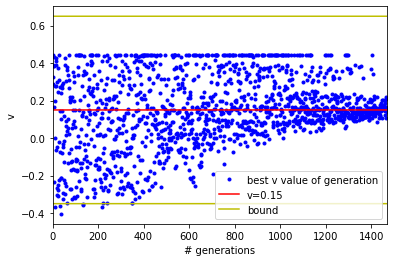

v=0.175


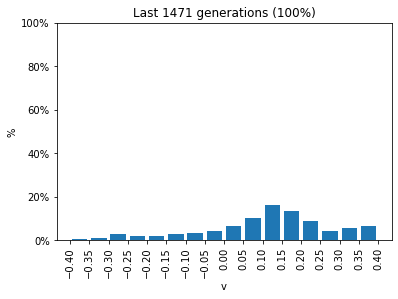

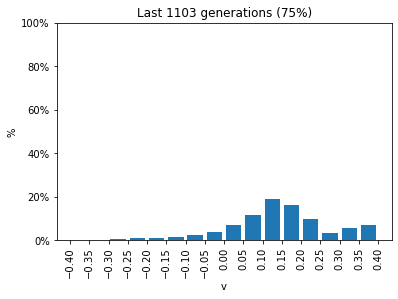

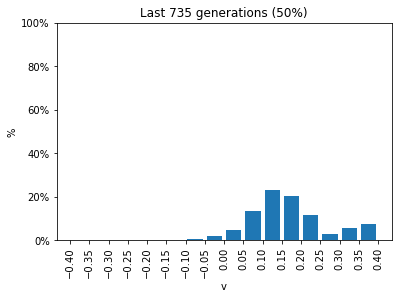

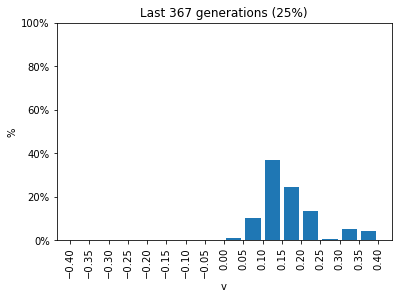

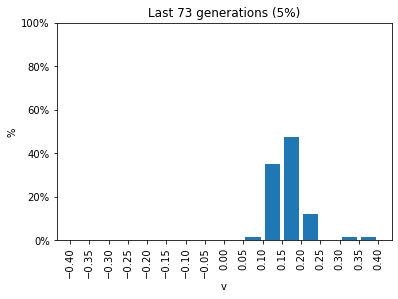

In [64]:
from matplotlib.ticker import PercentFormatter

v_track = np.array(v_track)
plt.figure()
plt.plot(v_track,'.',c='b',label='best v value of generation')
plt.plot(v_track*0+0.15,c='r',label=('v=0.15'))
plt.plot(v_track*0+0.15+cp_bound,c='y',label=('bound'))
plt.plot(v_track*0+0.15-cp_bound,c='y')
plt.xlim(0,v_track.size)
plt.xlabel('# generations')
plt.ylabel('v')
plt.legend()
plt.show()
print(f'v={np.round(findSolutionV2D(cp_bound, 10000),3)}')


plt.figure()
plt.hist(v_track, weights=np.ones(len(v_track)) / len(v_track), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {v_track.size} generations (100%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.25*v_track.size):], weights=np.ones(len(v_track[int(0.25*v_track.size):])) / len(v_track[int(0.25*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.75*v_track.size):} generations (75%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.5*v_track.size):], weights=np.ones(len(v_track[int(0.5*v_track.size):])) / len(v_track[int(0.5*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.5*v_track.size):} generations (50%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.75*v_track.size):], weights=np.ones(len(v_track[int(0.75*v_track.size):])) / len(v_track[int(0.75*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.25*v_track.size):} generations (25%)')
plt.show()

plt.figure()
plt.hist(v_track[int(0.95*v_track.size):], weights=np.ones(len(v_track[int(0.95*v_track.size):])) / len(v_track[int(0.95*v_track.size):]), bins=16, range=(-0.4,0.4), rwidth=0.8)
plt.xlabel('v')
plt.ylabel('%')
plt.xticks(np.arange(-0.4, 0.45, 0.05), rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0,1)
plt.title(f'Last {int(0.05*v_track.size):} generations (5%)')
plt.show()

In [ ]:
# 15x15 cp, offset 4 no lm_reduce, done in 948 gen., vals [0, 0.2]
# 15x15 cp, offset 4 with lm_reduce, done in 306 gen., vals [-0.1, 0.2]
# 15x15 cp, offset 3 no lm_reduce, done in 198 gen., vals [-0.1, 0.2]

# bounds to 3/4bound --> homes in on -0.064